## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

## Data Loading

In [2]:
# Load the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

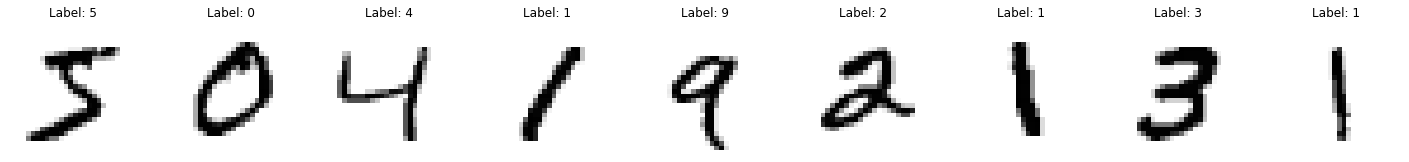

In [3]:
plt.figure(figsize=(25, 6))
for i in range(9):
    plt.subplot(1, 9, i+1)
    plt.imshow(X_train[i], cmap='binary')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

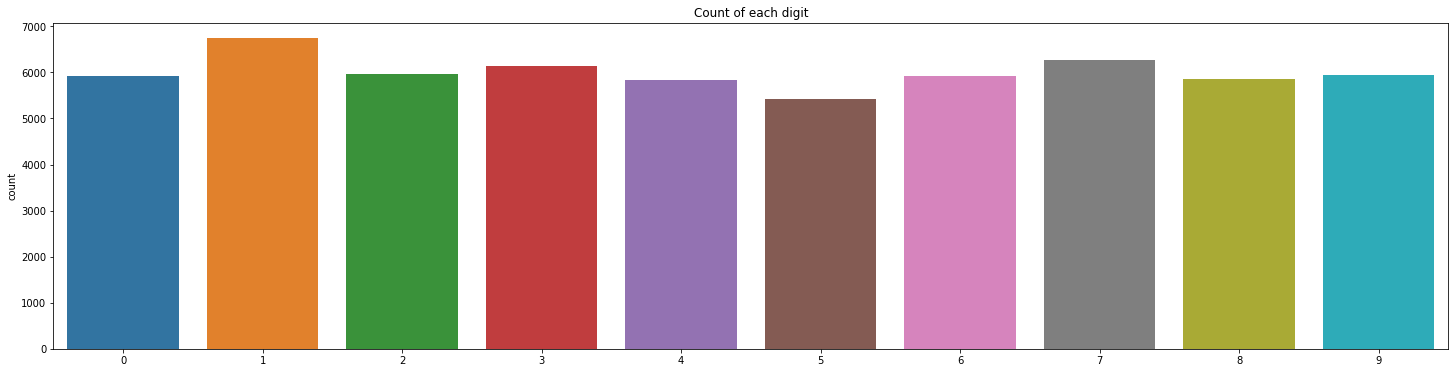

In [4]:
plt.figure(figsize=(25, 6))
sns.countplot(x=y_train)
plt.title('Count of each digit')
plt.show()

## Data Preprocessing

In [5]:
# Concatenate the training and test data as features and labels
features = np.concatenate((X_train, X_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

# Create a dataframe with the features and the labels
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

# Split the data into training, validation and test sets
train_dataset = dataset.take(int(len(dataset) * 0.8)).shuffle(len(dataset)).batch(23)
val_dataset = dataset.skip(int(len(dataset) * 0.8)).take(int(len(dataset) * 0.1)).batch(23)
test_dataset = dataset.skip(int(len(dataset) * 0.9)).batch(23)

In [6]:
print(f'Train dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(val_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Train dataset size: 2435
Validation dataset size: 305
Test dataset size: 305


## Modeling

In [7]:
def create_model(initializer):
    # Create the model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer=initializer,input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer=initializer))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

### Initializer

In [8]:
history = {}

#### Glorot Normal

In [9]:
model_glorot = create_model(initializer=tf.keras.initializers.glorot_normal())
model_glorot.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [10]:
history['glorot'] = model_glorot.fit(train_dataset, epochs=10, validation_data=val_dataset, verbose=1).history

Epoch 1/10
2435/2435 [==============================] - 15s 6ms/step - loss: 0.6676 - accuracy: 0.8544 - val_loss: 0.1212 - val_accuracy: 0.9686
Epoch 2/10
2435/2435 [==============================] - 15s 6ms/step - loss: 0.1853 - accuracy: 0.9481 - val_loss: 0.0951 - val_accuracy: 0.9733
Epoch 3/10
2435/2435 [==============================] - 15s 6ms/step - loss: 0.1348 - accuracy: 0.9620 - val_loss: 0.0875 - val_accuracy: 0.9767
Epoch 4/10
2435/2435 [==============================] - 15s 6ms/step - loss: 0.1176 - accuracy: 0.9664 - val_loss: 0.0930 - val_accuracy: 0.9771
Epoch 5/10
2435/2435 [==============================] - 16s 6ms/step - loss: 0.1000 - accuracy: 0.9718 - val_loss: 0.0843 - val_accuracy: 0.9780
Epoch 6/10
2435/2435 [==============================] - 16s 6ms/step - loss: 0.0907 - accuracy: 0.9737 - val_loss: 0.0887 - val_accuracy: 0.9777
Epoch 7/10
2435/2435 [==============================] - 15s 6ms/step - loss: 0.0824 - accuracy: 0.9765 - val_loss: 0.0834 - val_ac

#### He Normal

In [11]:
model_he = create_model(initializer=tf.keras.initializers.he_normal())
model_he.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [12]:
history['he'] = model_he.fit(train_dataset, epochs=10, validation_data=val_dataset, verbose=1).history

Epoch 1/10
2435/2435 [==============================] - 15s 6ms/step - loss: 3.6379 - accuracy: 0.3758 - val_loss: 1.1817 - val_accuracy: 0.6236
Epoch 2/10
2435/2435 [==============================] - 15s 6ms/step - loss: 1.4585 - accuracy: 0.5066 - val_loss: 0.8325 - val_accuracy: 0.7360
Epoch 3/10
2435/2435 [==============================] - 15s 6ms/step - loss: 1.1311 - accuracy: 0.6276 - val_loss: 0.5873 - val_accuracy: 0.8223
Epoch 4/10
2435/2435 [==============================] - 14s 6ms/step - loss: 0.8593 - accuracy: 0.7379 - val_loss: 0.4719 - val_accuracy: 0.8514
Epoch 5/10
2435/2435 [==============================] - 14s 6ms/step - loss: 0.6810 - accuracy: 0.7981 - val_loss: 0.6073 - val_accuracy: 0.9329
Epoch 6/10
2435/2435 [==============================] - 14s 6ms/step - loss: 0.5112 - accuracy: 0.8606 - val_loss: 0.2191 - val_accuracy: 0.9540
Epoch 7/10
2435/2435 [==============================] - 16s 7ms/step - loss: 0.3863 - accuracy: 0.8994 - val_loss: 0.1816 - val_ac

#### Random Normal

In [13]:
model_random = create_model(initializer=tf.keras.initializers.random_normal())
model_random.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

In [14]:
history['random'] = model_random.fit(train_dataset, epochs=10, validation_data=val_dataset, verbose=1).history

Epoch 1/10
2435/2435 [==============================] - 15s 6ms/step - loss: 0.8099 - accuracy: 0.8636 - val_loss: 0.1210 - val_accuracy: 0.9649
Epoch 2/10
2435/2435 [==============================] - 15s 6ms/step - loss: 0.1737 - accuracy: 0.9493 - val_loss: 0.0923 - val_accuracy: 0.9716
Epoch 3/10
2435/2435 [==============================] - 15s 6ms/step - loss: 0.1316 - accuracy: 0.9593 - val_loss: 0.0805 - val_accuracy: 0.9771
Epoch 4/10
2435/2435 [==============================] - 15s 6ms/step - loss: 0.1097 - accuracy: 0.9677 - val_loss: 0.0900 - val_accuracy: 0.9763
Epoch 5/10
2435/2435 [==============================] - 14s 6ms/step - loss: 0.0991 - accuracy: 0.9715 - val_loss: 0.0757 - val_accuracy: 0.9800
Epoch 6/10
2435/2435 [==============================] - 15s 6ms/step - loss: 0.0849 - accuracy: 0.9742 - val_loss: 0.0797 - val_accuracy: 0.9800
Epoch 7/10
2435/2435 [==============================] - 15s 6ms/step - loss: 0.0799 - accuracy: 0.9768 - val_loss: 0.0933 - val_ac

### Model Analysis

In [17]:
glorot = pd.DataFrame(history['glorot'])
he = pd.DataFrame(history['he'])
random = pd.DataFrame(history['random'])

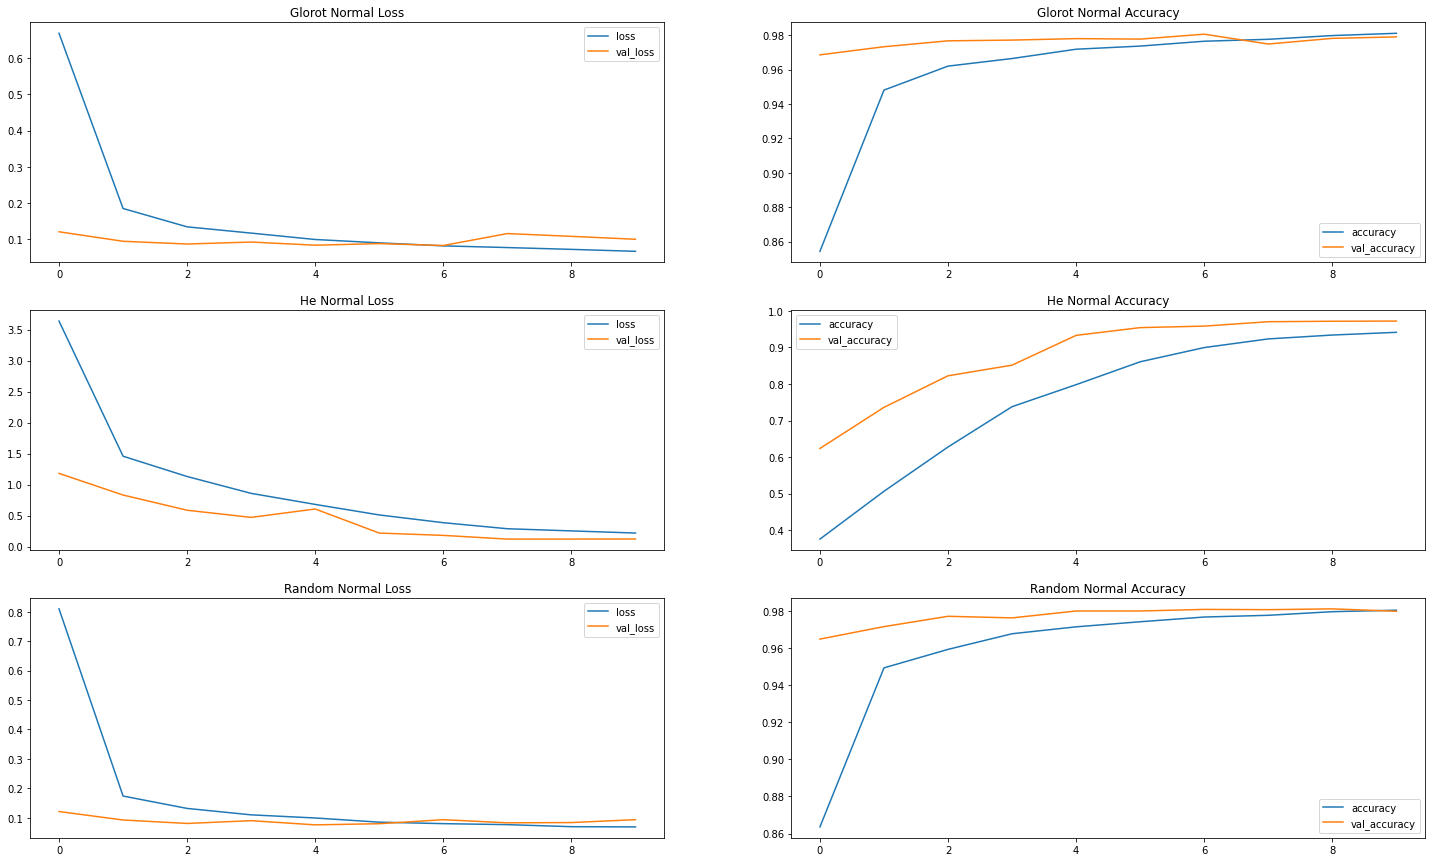

In [29]:
fig, ax = plt.subplots(3, 2, figsize=(25, 15))

# Glorot
glorot[['loss', 'val_loss']].plot(ax=ax[0, 0], title='Glorot Normal Loss')
glorot[['accuracy', 'val_accuracy']].plot(ax=ax[0, 1], title='Glorot Normal Accuracy')

# He
he[['loss', 'val_loss']].plot(ax=ax[1, 0], title='He Normal Loss')
he[['accuracy', 'val_accuracy']].plot(ax=ax[1, 1], title='He Normal Accuracy')

# Random
random[['loss', 'val_loss']].plot(ax=ax[2, 0], title='Random Normal Loss')
random[['accuracy', 'val_accuracy']].plot(ax=ax[2, 1], title='Random Normal Accuracy')
plt.show()